In [99]:
import pandas as pd
import seaborn as sns
from scipy import stats
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [6]:
# 1 Задание: Загрузка данных в pandas dataframe

df = pd.read_csv('HR.csv')
df.head(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [7]:
# Задание 2: Рассчитайте основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение).
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [11]:
df.mode() 

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.1,0.55,4.0,135,3.0,0.0,0.0,0.0,sales,low
1,NaN,NaN,NaN,156,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
 # Зададние 3: Рассчитайте и визуализировать корреляционную матрицу для количественных переменных. 
# Определите две самые скоррелированные и две наименее скоррелированные переменные.

In [17]:
# выбираем количественные перемменные
numeric_vars = ['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company']

In [19]:
# numeric_vars = ['satisfaction_level', ' last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company']

# Расчет корреляционной матрицы
df[numeric_vars].corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000


In [ ]:
# две самые скорретированные переменные это average_montly_hours и number_project. 
# Две наименее сккоррелированные это average_montly_hours и satisfaction_level

<Axes: >

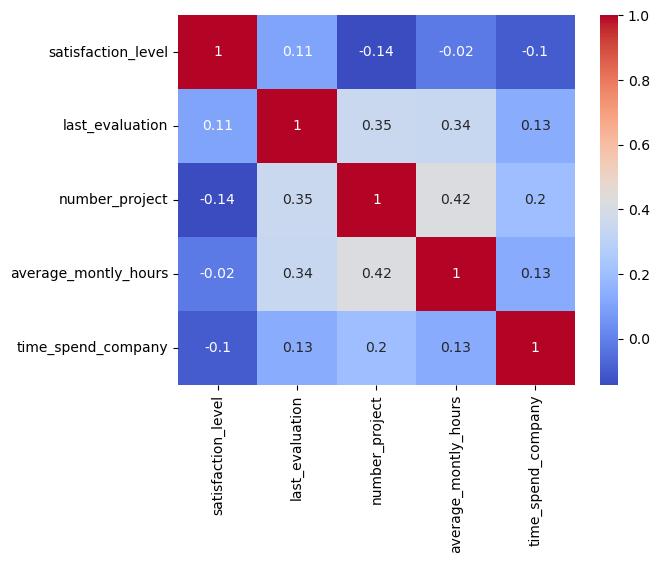

In [27]:
sns.heatmap(df[numeric_vars].corr(), cmap='coolwarm', annot=True)

In [ ]:
# Задание 4: Рассчитайте сколько сотрудников работает в каждом департаменте.

In [30]:
employee_by_department = df['department'].value_counts()
print(employee_by_department)

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64


In [ ]:
# Задание 5: Показать распределение сотрудников по зарплатам

<Axes: xlabel='salary', ylabel='count'>

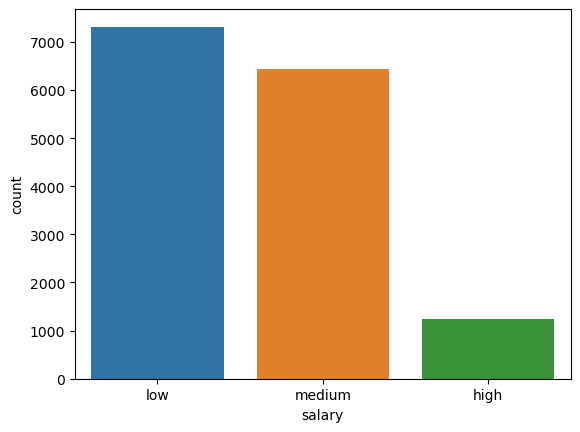

In [52]:
sns.countplot(x='salary', data=df)

In [ ]:
# Задание 6: Показать распределение сотрудников по зарплатам в каждом департаменте по отдельности

In [55]:
department_salary = df[['department', 'salary']].groupby('department').value_counts()
department_salary

department   salary
IT           low        609
             medium     535
             high        83
RandD        medium     372
             low        364
             high        51
accounting   low        358
             medium     335
             high        74
hr           medium     359
             low        335
             high        45
management   medium     225
             high       225
             low        180
marketing    low        402
             medium     376
             high        80
product_mng  low        451
             medium     383
             high        68
sales        low       2099
             medium    1772
             high       269
support      low       1146
             medium     942
             high       141
technical    low       1372
             medium    1147
             high       201
dtype: int64

<Axes: xlabel='department,salary'>

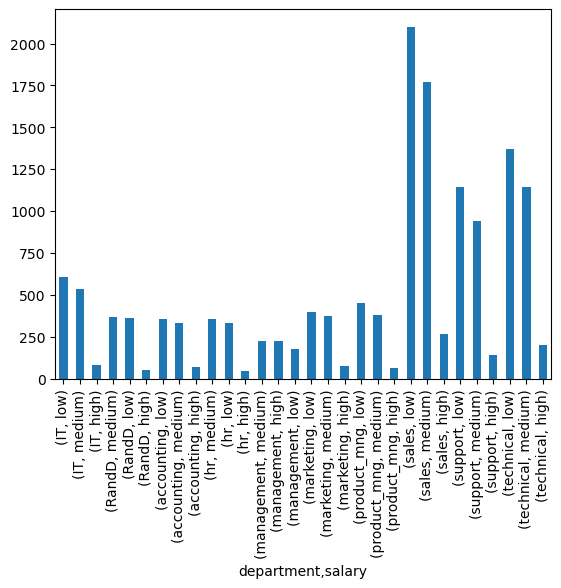

In [60]:
department_salary.plot(kind='bar', stacked=True)

In [ ]:
# Задание 7: Проверить гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом

In [ ]:
# В нашем случае можно обойтись обычным сравнением двух средних в обозначенных категориях.

In [64]:
high_salary = df[df['salary'] == 'high']
low_salary = df[df['salary'] == 'low']

In [67]:
print(f"Среднее время на работе для сотрудников с высоким окладом: {high_salary['average_montly_hours'].mean()} часов")
print(f"Среднее время на работе для сотрудников с низким окладом: {low_salary['average_montly_hours'].mean()} часов")

Среднее время на работе для сотрудников с высоким окладом: 199.86742118027485 часов
Среднее время на работе для сотрудников с низким окладом: 200.9965828321487 часов


In [ ]:
Следовательно, гипотеза не верная.

In [ ]:
# Задание 8: Рассчитать следующие показатели среди уволившихся и не уволившихся сотрудников (по отдельности):
# - Доля сотрудников с повышением за последние 5 лет
# - Средняя степень удовлетворенности
# - Среднее количество проектов

In [89]:
left = df[df['left'] == 1]
not_left = df[df['left'] == 0]
promotion_rate_left = left['promotion_last_5years'].count()
promotion_rate_not_left = not_left['promotion_last_5years'].count()
# projects_mean_left = left['number_projects'].mean()
# projects_mean_not_left = not_left['number_projects'].mean()

print("Доля сотрудников с повышением за последние 5 лет (уволившиеся):", round(promotion_rate_left/df['promotion_last_5years'].count(),2))
print("Доля сотрудников с повышением за последние 5 лет (не уволившиеся):", round(promotion_rate_not_left/df['promotion_last_5years'].count(),2))
print("Средняя степень удовлетворенности (уволившиеся):", round(left['satisfaction_level'].mean(),2))
print("Средняя степень удовлетворенности (не уволившиеся):", round(not_left['satisfaction_level'].mean(),2))
print("Среднее количество проектов (уволившиеся):", round(left['number_project'].mean(),1))
print("Среднее количество проектов (не уволившиеся):", round(not_left['number_project'].mean(),1))

Доля сотрудников с повышением за последние 5 лет (уволившиеся): 0.24
Доля сотрудников с повышением за последние 5 лет (не уволившиеся): 0.76
Средняя степень удовлетворенности (уволившиеся): 0.44
Средняя степень удовлетворенности (не уволившиеся): 0.67
Среднее количество проектов (уволившиеся): 3.9
Среднее количество проектов (не уволившиеся): 3.8


In [ ]:
# Задание 9: Разделить данные на тестовую и обучающую выборки. 
# Построить модель LDA, предсказывающую уволился ли сотрудник на основе имеющихся факторов (кроме department и salary). 
# Оценить качество модели на тестовой выборки

In [93]:
data = df.drop(['department', 'salary', 'left'], axis=1)
data.head(3)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
0,0.38,0.53,2,157,3,0,0
1,0.80,0.86,5,262,6,0,0
2,0.11,0.88,7,272,4,0,0


In [96]:
data_class = df['left']
data_class.head(3)

0    1
1    1
2    1
Name: left, dtype: int64

In [97]:
X_train, X_test, y_train, y_test = train_test_split(data, data_class, test_size=0.2, random_state=73)

In [100]:
lda_model = LinearDiscriminantAnalysis()
lda_model.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [101]:
# оценка точности модели на тестовой выборке
accuracy = lda_model.score(X_test, y_test)
print("Accuracy of LDA model:", accuracy)

Accuracy of LDA model: 0.7473333333333333
